In [1]:
import cv2
from ultralytics import YOLO
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [2]:
model = YOLO('model/best.pt')

In [4]:
# video_path = "multiple_rgby_01.mp4"
# video_path = "multiple_rgby_06.mp4"
video_path = "multiple_rgby_44.mp4"

cap = cv2.VideoCapture(video_path)
# cap = cv2.VideoCapture(1)

track_history = defaultdict(lambda: [])
count = 0
while cap.isOpened():
    success, frame = cap.read()

    if success:
        count+=1
        results = model.track(frame, persist=True)

        if results[0].boxes.id != None:
            boxes = results[0].boxes.xywh.cpu()
            track_ids = results[0].boxes.id.int().cpu().tolist()

            annotated_frame = results[0].plot()

            for box, track_id in zip(boxes, track_ids):
                x, y, w, h = box
                track = track_history[track_id]
                track.append((float(x), float(y)))

                points = np.hstack(track).astype(np.int32).reshape((-1, 1, 2))
                cv2.polylines(annotated_frame, [points], isClosed=False, color=(230, 230, 230), thickness=8)

            cv2.imshow("YOLOv8 Tracking", annotated_frame)

        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        break

cap.release()
cv2.destroyAllWindows()


0: 384x640 1 red_cube, 1 blue_cube, 1 yellow_cube, 296.7ms
Speed: 222.6ms preprocess, 296.7ms inference, 6.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 342.0ms
Speed: 7.5ms preprocess, 342.0ms inference, 9.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 194.4ms
Speed: 3.7ms preprocess, 194.4ms inference, 5.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 179.3ms
Speed: 3.4ms preprocess, 179.3ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 174.2ms
Speed: 4.8ms preprocess, 174.2ms inference, 6.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 179.4ms
Speed: 3.5ms preprocess, 179.4ms inference, 5.6ms postprocess per image at sha

In [7]:
first_data_list = []
second_data_list = []
for key, value in track_history.items() :
    track_data = value
    if len(track_data)<count-2:
        continue
    print(key, value)
    first_data = [round(track_data[-1][0]-track_data[0][0], 2)]
    second_data = [round(track_data[-1][1]-track_data[0][1], 2)]
    first_data_list.append(first_data)
    second_data_list.append(second_data)


7 [(662.9783935546875, 233.9720458984375), (663.08056640625, 233.94854736328125), (663.2149658203125, 233.94369506835938), (663.1543579101562, 233.8502197265625), (663.0537109375, 233.88340759277344), (663.1357421875, 233.87823486328125), (663.0814208984375, 233.91888427734375), (663.0427856445312, 233.94424438476562), (663.133056640625, 233.8582763671875), (663.16064453125, 233.82669067382812), (663.1898193359375, 233.90301513671875), (663.126953125, 233.9141387939453), (663.2010498046875, 233.87054443359375), (663.1572265625, 233.933837890625), (663.1942749023438, 233.9555206298828), (663.1849365234375, 233.91915893554688), (663.1968994140625, 233.89486694335938), (663.23193359375, 233.94732666015625), (663.2318115234375, 233.90821838378906), (663.217529296875, 233.89129638671875), (663.153564453125, 233.8147735595703), (663.2322387695312, 233.8074951171875), (663.15380859375, 233.83743286132812), (663.1637573242188, 233.913330078125), (663.1927490234375, 233.92047119140625), (663.12

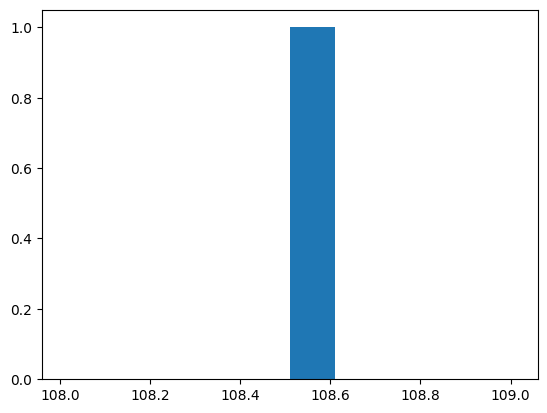

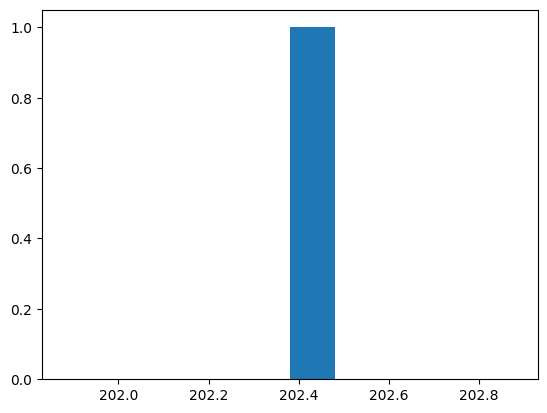

In [8]:
for i in range(len(first_data_list)):
    plt.hist(first_data_list[i])
    plt.show()
    plt.hist(second_data_list[i])
    plt.show()